In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from Node import Node

In [3]:
mnistdir='/Users/yoavfreund/datasets/NN_MNIST/MNIST/'
!ls $mnistdir

data=load(mnistdir+'train_data.npy')
data.shape

test_data.npy    test_labels.npy  train_data.npy   train_labels.npy


### finding a cover

In [13]:
permutation?

In [5]:
%%time
m=100
data=permutation(data)
def source():
    i=0
    while True:
        yield data[i:i+m,:]
        i=(i+m)%(data.shape[0]-m)

node=Node(source,debug=0,epsilon=2500)        

cover=node.find_cover()

cover.shape

CPU times: user 3 ms, sys: 2.74 ms, total: 5.74 ms
Wall time: 4.72 ms


### Split Examples

In [7]:
def split_entropy(subset):
    sizes=array([a.shape[0] for a in subset])
    sizes=sizes/np.sum(sizes)
    return sum(sizes*log(1/sizes))/log(sizes.shape[0])

In [8]:
%%time
subset=node.split(data,cover)
split_entropy(subset)

CPU times: user 59.1 ms, sys: 6.52 ms, total: 65.6 ms
Wall time: 64.9 ms


0.7635856309388295

In [9]:
%%time
cover=node.refine_cover(cover,data,iterations=20)

CPU times: user 1.25 s, sys: 119 ms, total: 1.37 s
Wall time: 1.37 s


In [10]:
%%time
subset=node.split(data,cover)
split_entropy(subset)

CPU times: user 59.7 ms, sys: 6.1 ms, total: 65.8 ms
Wall time: 64.8 ms


0.984583403836916

In [11]:
def image(I):
    X=reshape(I,[28,28])
    imshow(X)

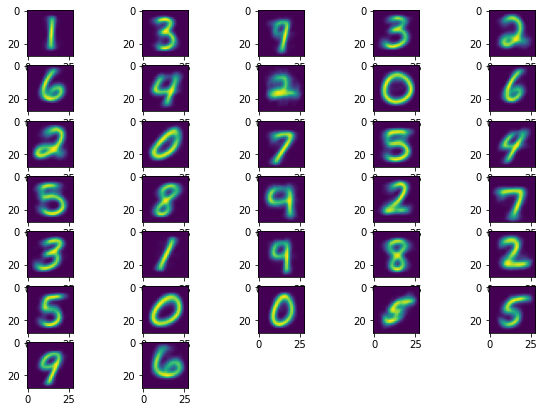

In [12]:
figure(figsize=[10,10])
for i in range(cover.shape[0]):
    subplot(10,5,i+1)
    image(cover[i,:])

### Hierarchical partitioning

In [14]:
np.zeros([0,0])

array([], shape=(0, 0), dtype=float64)

In [ ]:
class Queue:
    def __init__(self,In:Queue,buf_size=1000,block_size=100):
        self.buffer=np.zeros([0,0])
        self.buf_size=buf_size
        self.block_size=block_size
    def __iter__(self):
        return self
    def __next__(self):
        s=buffer.shape[0]
        if s>0:
            c=min(block_size,s)
            B0=buffer[:s,:]
            B1=buffer[s:,:]
        